In [1]:
from prophet import Prophet
import pandas as pd
from matplotlib import pyplot as plt

c:\Users\User\Documents\Year 4\MLFinalAssignment\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [10]:
data = pd.read_csv('./UsageByDayClean.csv',usecols=['TIME','BIKE USAGE'])
data['TIME'] = pd.to_datetime(data['TIME'])
data.rename(columns={'TIME':'ds','BIKE USAGE':'y'},inplace=True)

pre_covid_date = pd.to_datetime('2020-02-01')
# remove all data after 2020-03-27 and that has a value y over 1500 
data_in_covid = data[(data['ds'] >= pre_covid_date) & (data['y'] < 1200)]
data_pre_covid = data[data['ds'] < pre_covid_date]

20:41:30 - cmdstanpy - INFO - Chain [1] start processing
20:41:30 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\User\Documents\Year 4\MLFinalAssignment\venv\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\User\Documents\Year 4\MLFinalAssignment\venv\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


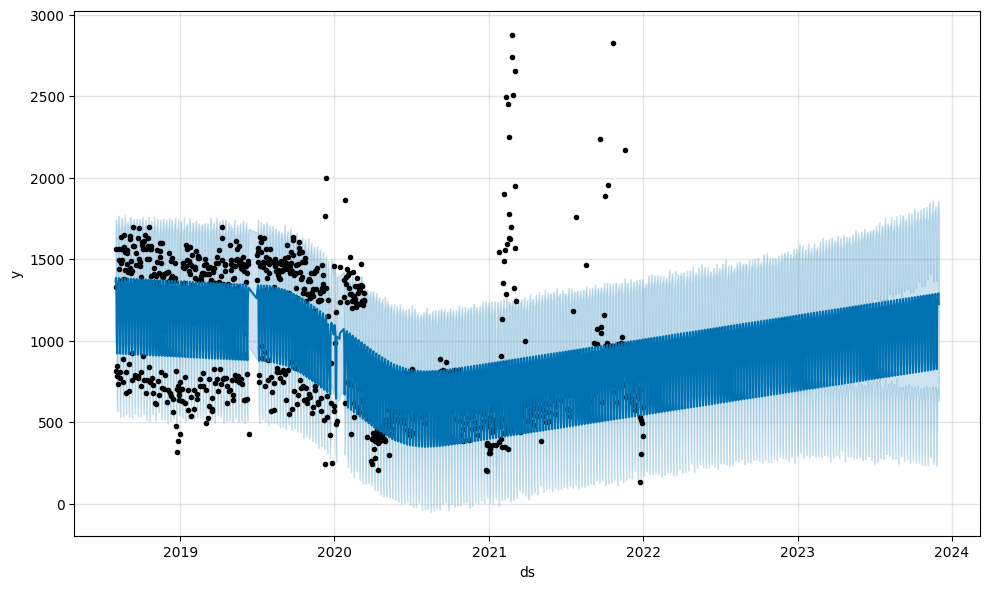

In [13]:
model = Prophet(yearly_seasonality=True,weekly_seasonality=True,daily_seasonality=False)
model.fit(data)
future = model.make_future_dataframe(periods=700)
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()